In [1]:
import numpy as np

In [2]:
#mention location of the train and test data
train_data_dir = "v_data/train" 
test_data_dir = "v_data/test"

In [30]:
from tensorflow.keras import backend as K
img_height, img_width = 224,224

In [10]:
K.image_data_format() #check how tensorflow is accepting the data

'channels_last'

In [9]:
#mention shape according to the tensorflow
if K.image_data_format() == "channels_first": 
    input_shape = (3,img_height,img_width)
else:
    input_shape = (img_height,img_width,3)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten,Dense



In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32,(2,2), input_shape=input_shape)) #32 = > no. of kernels , 2,2 => size of kernetl
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #pool_size = 2,2

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#ann
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))





In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


In [31]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size = 16,
        class_mode='binary'
    )

Found 400 images belonging to 2 classes.


In [34]:
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width,img_height),
        batch_size = 16,
        class_mode='binary'
    )

Found 100 images belonging to 2 classes.


In [35]:
model.fit_generator(
    train_generator,
    epochs = 3,
    steps_per_epoch = 400 // 16,
    validation_data=test_generator,
    validation_steps= 100 // 16
    #callbacks = [es]
)

C:\Users\thewa\AppData\Local\Temp\ipykernel_15756\1604865962.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/3
25/25 [==============================] - 17s 614ms/step - loss: 52.1770 - accuracy: 0.6100 - val_loss: 0.5894 - val_accuracy: 0.7604
Epoch 2/3
25/25 [==============================] - 14s 576ms/step - loss: 0.4234 - accuracy: 0.7975 - val_loss: 0.3381 - val_accuracy: 0.8646
Epoch 3/3
25/25 [==============================] - 14s 544ms/step - loss: 0.2763 - accuracy: 0.9200 - val_loss: 0.3637 - val_accuracy: 0.8333


In [37]:
400 // 32

12

In [38]:
from tensorflow.keras.preprocessing.image import load_img

In [56]:
image = load_img("v_data/test/planes/15.jpg")

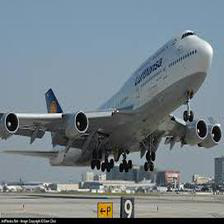

In [57]:
image

In [58]:
import numpy as np

In [59]:
img_array = np.array(image)

In [60]:
img_array

array([[[122, 150, 172],
        [122, 150, 172],
        [122, 150, 172],
        ...,
        [122, 150, 172],
        [122, 150, 172],
        [122, 150, 172]],

       [[122, 150, 172],
        [122, 150, 172],
        [122, 150, 172],
        ...,
        [122, 150, 172],
        [122, 150, 172],
        [122, 150, 172]],

       [[122, 150, 172],
        [122, 150, 172],
        [122, 150, 172],
        ...,
        [122, 150, 172],
        [122, 150, 172],
        [122, 150, 172]],

       ...,

       [[  2,   4,   1],
        [ 83,  85,  82],
        [173, 175, 172],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2]],

       [[ 35,  39,  38],
        [ 51,  55,  54],
        [ 61,  65,  64],
        ...,
        [  0,   0,   2],
        [  3,   3,   5],
        [  5,   5,   7]],

       [[  0,   1,   0],
        [ 15,  19,  18],
        [  0,   1,   0],
        ...,
        [  1,   1,   3],
        [  0,   0,   2],
        [  0,   0,   2]]

In [61]:
img_array.shape

(224, 224, 3)

In [62]:
img_array_reshape = img_array.reshape(1,224, 224, 3)

In [63]:
img_array_reshape

array([[[[122, 150, 172],
         [122, 150, 172],
         [122, 150, 172],
         ...,
         [122, 150, 172],
         [122, 150, 172],
         [122, 150, 172]],

        [[122, 150, 172],
         [122, 150, 172],
         [122, 150, 172],
         ...,
         [122, 150, 172],
         [122, 150, 172],
         [122, 150, 172]],

        [[122, 150, 172],
         [122, 150, 172],
         [122, 150, 172],
         ...,
         [122, 150, 172],
         [122, 150, 172],
         [122, 150, 172]],

        ...,

        [[  2,   4,   1],
         [ 83,  85,  82],
         [173, 175, 172],
         ...,
         [  0,   0,   2],
         [  0,   0,   2],
         [  0,   0,   2]],

        [[ 35,  39,  38],
         [ 51,  55,  54],
         [ 61,  65,  64],
         ...,
         [  0,   0,   2],
         [  3,   3,   5],
         [  5,   5,   7]],

        [[  0,   1,   0],
         [ 15,  19,  18],
         [  0,   1,   0],
         ...,
         [  1,   1,   3],
        

In [64]:
img_array_reshape.shape

(1, 224, 224, 3)

In [65]:
model.predict(img_array_reshape)

1/1 [==============================] - 0s 41ms/step


array([[0.97992325]], dtype=float32)

In [66]:
if model.predict(img_array_reshape) >= 0.5:
    print("planes")
else:
    print("cars")

1/1 [==============================] - 0s 28ms/step
planes


In [69]:
image = load_img("v_data/test/cars/18.jpg")

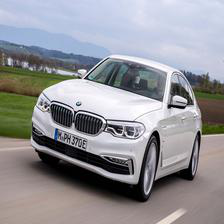

In [70]:
image

In [72]:
image = load_img("v_data/test/cars/18.jpg")
image
img_array = np.array(image)
img_array_reshape = img_array.reshape(1,224,224,3)
output = model.predict(img_array_reshape)
print(output)
if output >= 0.5:
    print("Planes")
else:
    print("car")

1/1 [==============================] - 0s 32ms/step
[[0.00104192]]
car


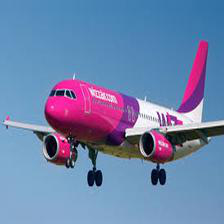

In [75]:
image = load_img("v_data/test/planes/18.jpg")
image


In [76]:
img_array = np.array(image)
img_array_reshape = img_array.reshape(1,224,224,3)
output = model.predict(img_array_reshape)
print(output)
if output >= 0.5:
    print("Planes")
else:
    print("car")

1/1 [==============================] - 0s 65ms/step
[[0.85636425]]
Planes


In [80]:
for i in range(30,41):
    image = load_img("v_data/test/cars/"+str(i)+".jpg")
    img_array = np.array(image)
    img_array_reshape = img_array.reshape(1,224,224,3)
    output = model.predict(img_array_reshape)
    print(output)
    if output >= 0.5:
        print("Planes")
    else:
        print("car")

1/1 [==============================] - 0s 47ms/step
[[0.63659114]]
Planes
1/1 [==============================] - 0s 38ms/step
[[0.00137909]]
car
1/1 [==============================] - 0s 47ms/step
[[0.12434313]]
car
1/1 [==============================] - 0s 32ms/step
[[0.22582279]]
car
1/1 [==============================] - 0s 32ms/step
[[0.00316369]]
car
1/1 [==============================] - 0s 51ms/step
[[0.00112289]]
car
1/1 [==============================] - 0s 41ms/step
[[0.7897843]]
Planes
1/1 [==============================] - 0s 64ms/step
[[0.02410878]]
car
1/1 [==============================] - 0s 49ms/step
[[0.01780323]]
car
1/1 [==============================] - 0s 56ms/step
[[0.01850929]]
car
1/1 [==============================] - 0s 125ms/step
[[0.00970307]]
car


'priyaka1'